<a href="https://colab.research.google.com/github/frizzyfreak/Natural-Language-Processing/blob/main/UCS749_Lab2_Sampling_and_Spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating a synthetic signal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def get_signal_Hz(Hz,sample_rate,length_ts_sec):
    ## 1 sec length time series with sampling rate
    ts1sec = list(np.linspace(0,np.pi*2*Hz,sample_rate))
    ## 1 sec length time series with sampling rate
    ts = ts1sec*length_ts_sec
    return(list(np.sin(ts)))

sample_rate   = 4000
length_ts_sec = 3
## --------------------------------- ##
## 3 seconds of "digit 1" sound
## Pressing digit 2 buttom generates
## the sine waves at frequency
## 697Hz and 1209Hz.
## --------------------------------- ##
ts1  = np.array(get_signal_Hz(697, sample_rate,length_ts_sec))
ts1 += np.array(get_signal_Hz(1209,sample_rate,length_ts_sec))
ts1  = list(ts1)

## -------------------- ##
## 2 seconds of silence
## -------------------- ##
ts_silence = [0]*sample_rate*1

## --------------------------------- ##
## 3 seconds of "digit 2" sounds
## Pressing digit 2 buttom generates
## the sine waves at frequency
## 697Hz and 1336Hz.
## --------------------------------- ##
ts2  = np.array(get_signal_Hz(697, sample_rate,length_ts_sec))
ts2 += np.array(get_signal_Hz(1336,sample_rate,length_ts_sec))
ts2  = list(ts2)

## -------------------- ##
## Add up to 7 seconds
## ------------------- ##
ts = ts1 + ts_silence  + ts2

In [ ]:
ts1sec = list(np.linspace(0,np.pi*2*300,500))
ts1sec

[0.0,
 3.7774661165408334,
 7.554932233081667,
 11.332398349622501,
 15.109864466163334,
 18.887330582704166,
 22.664796699245002,
 26.442262815785835,
 30.219728932326667,
 33.9971950488675,
 37.77466116540833,
 41.55212728194917,
 45.329593398490005,
 49.10705951503083,
 52.88452563157167,
 56.6619917481125,
 60.439457864653335,
 64.21692398119417,
 67.994390097735,
 71.77185621427583,
 75.54932233081666,
 79.3267884473575,
 83.10425456389834,
 86.88172068043917,
 90.65918679698001,
 94.43665291352083,
 98.21411903006167,
 101.9915851466025,
 105.76905126314334,
 109.54651737968418,
 113.323983496225,
 117.10144961276583,
 120.87891572930667,
 124.6563818458475,
 128.43384796238834,
 132.21131407892918,
 135.98878019547,
 139.76624631201085,
 143.54371242855166,
 147.3211785450925,
 151.09864466163333,
 154.87611077817417,
 158.653576894715,
 162.43104301125584,
 166.20850912779667,
 169.9859752443375,
 173.76344136087835,
 177.54090747741918,
 181.31837359396002,
 185.09583971050083

In [ ]:
print(ts)

[0.0, 1.835422440561695, 0.20302923280378515, -0.6950368379886085, 0.022063207416072372, -0.7956195322977582, -0.6367639828794779, 1.6496707737932192, 1.1055538217799576, -1.4014099829165922, -0.8534139313640684, 0.39240681868393457, -0.17602234419818763, 0.5706093988718031, 1.3614826639382727, -0.8759265236125995, -1.8241795251616821, 0.538201143384787, 1.116756057528229, -0.07325165853097237, 0.37675473592660835, -0.031593374951713105, -1.6757583522886397, -0.2331351923248933, 1.9121418959367138, 0.4238302953657171, -0.9660965498727209, -0.10830839533592407, -0.4661083704705097, -0.6581399289121093, 1.4156042273033402, 1.2918162998010003, -1.3566851922408292, -1.1455449296650384, 0.5348785386199483, 0.09976475648696065, 0.3207898857331367, 1.2361542415406954, -0.6258705647640034, -1.9233702170515756, 0.37515465978383267, 1.4053035471809114, -0.042497719372454834, 0.03377414188347377, 0.07343083748475032, -1.4445207544855418, -0.4420060999596316, 1.901359414416838, 0.6725627138467531,

In [ ]:
from IPython.display import Audio
audio=Audio(ts, rate=sample_rate)
audio


Spectrograms are visual representations of audio – representing time, frequency, and amplitude all on one graph. They visually reveal audio problems by sight, like broadband, electrical, or intermittent noise, which can help us make decisions with mixing music or editing sound.

A short-time Fourier transform (STFT) is the effect of windowing a signal and calculating its discrete Fourier transform (DFT).
Spectrogram is the magnitude of the STFT.

The total time series length = 7.0 sec (N points = 28000) 


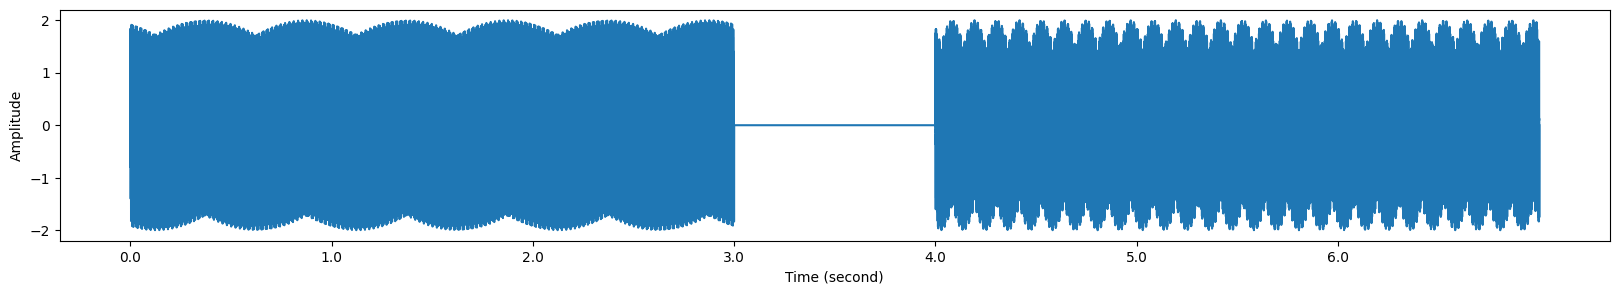

In [ ]:
total_ts_sec = len(ts)/sample_rate#no of sampled data points/no of sampled data points eacg second
print("The total time series length = {} sec (N points = {}) ".format(total_ts_sec, len(ts)))
plt.figure(figsize=(20,3))
plt.plot(ts)
plt.xticks(np.arange(0,len(ts),sample_rate),np.arange(0,len(ts)/sample_rate,1))
plt.ylabel("Amplitude")
plt.xlabel("Time (second)")
plt.show()

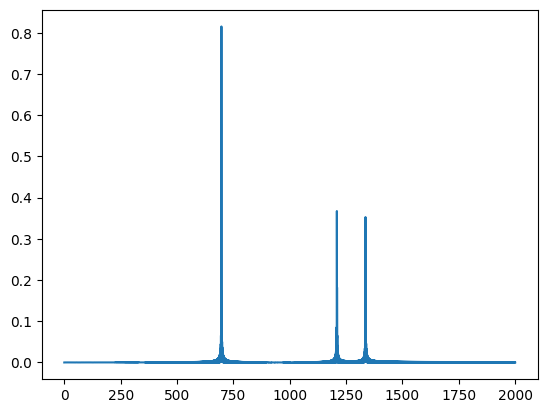

In [ ]:
from scipy.fft import fft, fftfreq
N = sample_rate * 7

yf = fft(ts)[:N//2]
xf = fftfreq(N, 1 / sample_rate)[:N//2]

plt.plot(xf, (2/N)*np.abs(yf))
plt.show()

In [ ]:
2/N*yf[0:N//2]

array([-3.70370401e-16-0.00000000e+00j,  9.57793648e-06+7.07955162e-05j,
        1.92733127e-06-1.27573652e-04j, ...,
       -3.46898104e-05+3.44257973e-06j,  9.70869153e-05+3.66568539e-06j,
       -1.40256126e-04+4.84829779e-05j])

*Q1: Convert the above signal to frequency vs time.*

Spectrogram using Scipy

In [ ]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

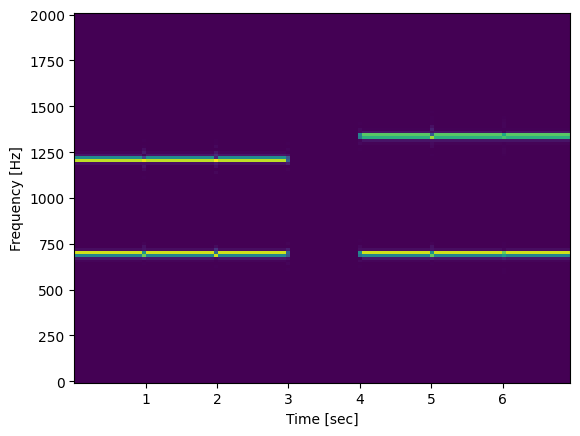

In [ ]:
#computing STFT i.e. fourier transforms in regular intervals
f, t, Sxx = signal.spectrogram(np.array(ts), 4000)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
Sxx

array([[3.89662582e-06, 3.43909449e-07, 2.75170209e-06, ...,
        5.08192192e-06, 1.39256755e-06, 2.22482583e-07],
       [1.43652219e-07, 1.27125256e-08, 1.03530603e-07, ...,
        1.88485661e-07, 5.13120713e-08, 8.20178571e-09],
       [1.07021352e-07, 8.69613638e-09, 7.81449716e-08, ...,
        1.41235879e-07, 3.74922024e-08, 5.69820067e-09],
       ...,
       [8.98257582e-11, 6.02535711e-11, 6.11052277e-11, ...,
        2.60392136e-10, 2.12821313e-10, 1.77848029e-10],
       [4.85485998e-11, 3.32984932e-11, 3.89847262e-11, ...,
        9.76414777e-11, 8.49345947e-11, 7.85053112e-11],
       [1.61435962e-11, 4.69033650e-12, 1.12727023e-11, ...,
        2.57163226e-11, 7.68874747e-12, 5.31567022e-12]])

In [ ]:
import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
audio_data=np.array(ts)

In [ ]:
stft_audio = librosa.stft(audio_data, n_fft = 2048, hop_length = 512)
#n_fft=length of the windowed signal
#hop_length= number of samples between two successive frames

<ipython-input-12-0b5baa1a7e99>:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft_audio, sr = 4000, hop_length = 512, x_axis = "time", y_axis = "linear")


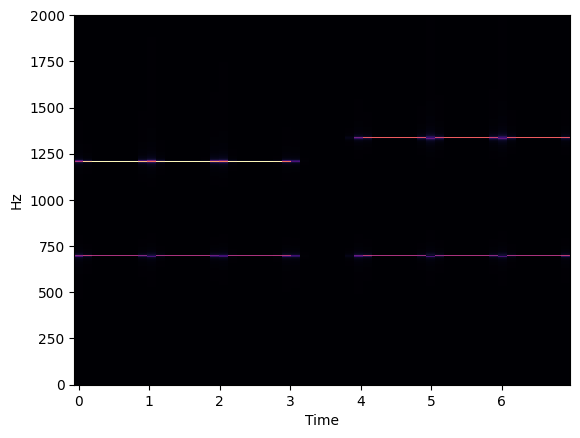

In [ ]:
librosa.display.specshow(stft_audio, sr = 4000, hop_length = 512, x_axis = "time", y_axis = "linear")

*Q2. Plot the spectrogram of a .wav file.*

<ipython-input-4-cdd675c3e939>:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read('BAK.wav')


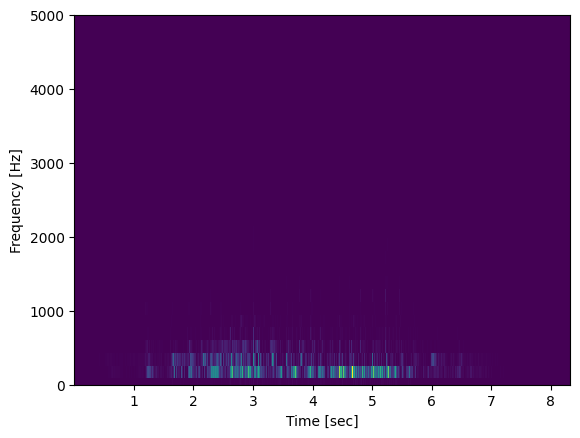

In [4]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
sample_rate, samples = wavfile.read('BAK.wav')
if len(samples.shape) > 1:
    # Average the stereo channels to get a mono signal
    samples = np.mean(samples, axis=1)
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
#plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0,5000])
plt.show()

In [ ]:
samples.shape

(367538, 2)

In [ ]:
times.shape

(1,)

In [ ]:
samples.shape

(367538,)

In [ ]:
samples

array([18.,  9., -4., ...,  0.,  0.,  0.])